In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import CovarianceMatrix_v12 as cmv12

%matplotlib inline

In [110]:
M = 1.5e14
z = 0.15
fsky= 6000./41253

r_min, r_max, Dr = 10, 160, 2

p_fid = {'h': 0.67, 'ombh2': 0.02256, 'omch2': 0.1142, 'ns': 0.97}

cm_v12 = cmv12.CovarianceMatrix_v12(z = z, M = M,
               fsky = fsky,
               r_min = r_min, r_max = r_max, Dr = Dr,
               **p_fid)

cm_v12.setPower()

Power is set, you can start the calculation!


In [111]:
# Cosmic variance
cv_v12 = cm_v12.cosmic_var()

In [112]:
# Shot noise
sn_v12 = cm_v12.shot_noise()

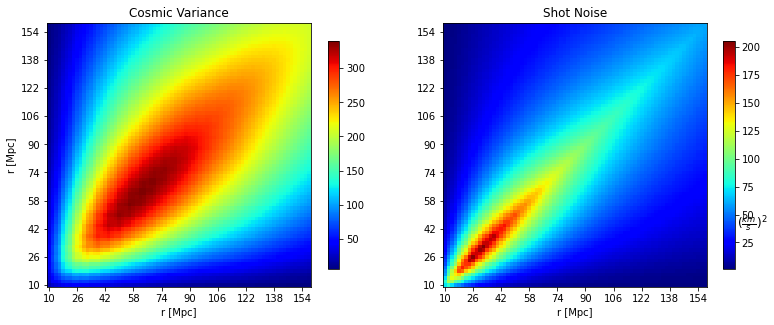

In [113]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 6))

plot1 = ax1.imshow(cv_v12, origin = "lower", cmap = "jet")
cbar = fig.colorbar(plot1, ax = ax1, shrink = 0.7)
ax1_ = cbar.ax
#ax1_.text(700., 95, r'$(\frac{km}{s})^2$', rotation = 0, size = 12)

ax1.set_xticks(range(cv_v12.shape[0])[::8], minor = False)
ax1.set_xticklabels(np.arange(r_min, r_max, Dr)[::8], minor = False)

ax1.set_yticks(range(cv_v12.shape[0])[::8], minor = False)
ax1.set_yticklabels(np.arange(r_min, r_max, Dr)[::8], minor = False)

ax1.set_title("Cosmic Variance")

ax1.set_xlabel("r [Mpc]", size = 10)
ax1.set_ylabel("r [Mpc]", size = 10)

# =============================================================================

plot2 = ax2.imshow(sn_v12, origin = "lower", cmap = "jet")
cbar = fig.colorbar(plot2, ax = ax2, shrink = 0.7)
ax2_ = cbar.ax
ax2_.text(250., 38, r'$(\frac{km}{s})^2$', rotation = 0, size = 12)

ax2.set_xticks(range(cv_v12.shape[0])[::8], minor = False)
ax2.set_xticklabels(np.arange(r_min, r_max, Dr)[::8], minor = False)

ax2.set_title("Shot Noise")

ax2.set_yticks(range(cv_v12.shape[0])[::8], minor = False)
ax2.set_yticklabels(np.arange(r_min, r_max, Dr)[::8], minor = False)

#ax2.set_ylabel("r [Mpc]", size = 10)
ax2.set_xlabel("r [Mpc]", size = 10);

#plt.savefig("CV_SN.pdf");

Power is set, you can start the calculation!
Power is set, you can start the calculation!
Power is set, you can start the calculation!


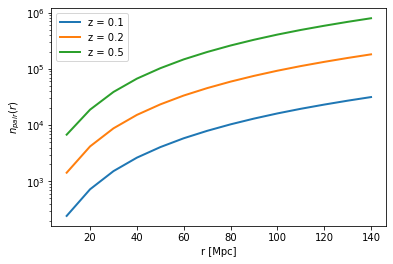

In [52]:
z = 0.15
fsky= 6000./41253
M = 1e14

r_min, r_max, Dr = 10, 150, 10

NPAIRS = {}

for z in [0.1, 0.2, 0.5]:

    p_fid = {'h': 0.67, 'ombh2': 0.02256, 'omch2': 0.1142, 'ns': 0.97}

    cm_v12 = cmv12.CovarianceMatrix_v12(z = z, M = M,
                   fsky = fsky,
                   r_min = r_min, r_max = r_max, Dr = Dr,
                   **p_fid)

    cm_v12.setPower()
    NPAIRS[z] = cm_v12.npair()

    
# ====================================================================
plt.figure()

plt.semilogy(cm_v12.R_range(), NPAIRS[0.1], label = "z = 0.1", lw = 2)
plt.semilogy(cm_v12.R_range(), NPAIRS[0.2], label = "z = 0.2", lw = 2)
plt.semilogy(cm_v12.R_range(), NPAIRS[0.5], label = "z = 0.5", lw = 2)

plt.ylabel(r'$n_{pair}(r)$')
plt.xlabel(r'r [Mpc]')

plt.legend();    

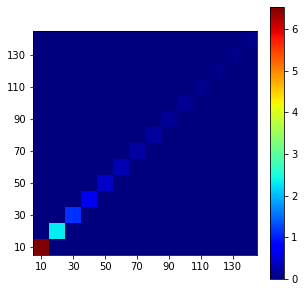

In [54]:
# Measurement error
Cmeasure = cm_v12.measurement(110., 100., True)

plt.figure(figsize = (5, 5))

plt.imshow(Cmeasure, cmap = "jet", origin = "lower")
plt.colorbar()

plt.xticks(range(cm_v12.R_range().size)[::2], np.arange(r_min, r_max, Dr)[::2])
plt.yticks(range(cm_v12.R_range().size)[::2], np.arange(r_min, r_max, Dr)[::2]);

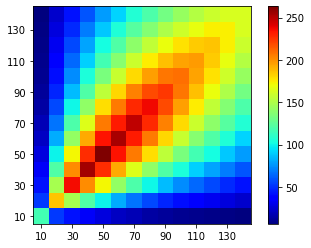

In [30]:
# Full covariance matrix
plt.imshow(Cmeasure + cv_v12 + sn_v12, cmap = "jet", origin = "lower")
plt.colorbar()

plt.xticks(range(cm_v12.R_range().size)[::2], np.arange(r_min, r_max, Dr)[::2])
plt.yticks(range(cm_v12.R_range().size)[::2], np.arange(r_min, r_max, Dr)[::2]);

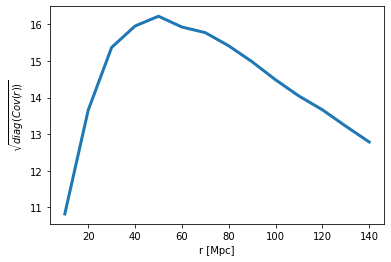

In [38]:
plt.plot(cm_v12.R_range(), np.sqrt(Cmeasure.diagonal() + cv_v12.diagonal() + sn_v12.diagonal()), lw = 3)

plt.xlabel(r'r [Mpc]')
plt.ylabel(r'$\sqrt{diag(Cov(r))}$');

# Trash after here

In [15]:
def overDensityNL(z):
    
    """
    
    
    """
    
    x = Omega_m(z) - 0.2
    y = 1.0 - x
    
    c = np.zeros(shape = (5, 5))
    
    c[0][0]=546.67; c[0][1]=-137.82; c[0][2]=94.083; c[0][3]=-204.68; c[0][4]=111.51;
    c[1][0]=-1745.6; c[1][1]=627.22; c[1][2]=-1175.2; c[1][3]=2445.7; c[1][4]=-1341.7;
    c[2][0]=3928.8; c[2][1]=-1519.3; c[2][2]=4015.8; c[2][3]=-8415.3; c[2][4]=4621.1;
    c[3][0]=-4384.8; c[3][1]=1748.7; c[3][2]=-5362.1; c[3][3]=11257; c[3][4]=-6218.2;
    c[4][0]=1842.3; c[4][1]=-765.53; c[4][2]=2507.7; c[4][3]=-5210.7; c[4][4]=2867.5;
    
    sum_ = 0.0
    
    for i in range(5):
        
        for j in range(5):
            
            sum_ += c[i][j] * x**i * y**j
            
    return sum_


def f(x):
    
    return x**3 * (np.log(1.0 + 1.0/x) - 1.0/(1.0 + x))


def M200toMvir(M200, z, c = 4):
    
    """
    Assuming h = 200, and virial radius is 500 (v is 500)
    """
    
    DELTA_V = overDensityNL(z)   # instead of 178
    
    a = [0.5116, -0.4283, -3.13e-3, -3.52e-5]
    
    f_h = 200.0/DELTA_V * f(1.0/c)   
    
    p = a[1] + a[2] * np.log(f_h) * a[3] * (np.log(f_h))**2
    
    x_of_f = 1.0/np.sqrt(a[0] * f_h**(2*p) + (3.0/4)**2) + 2.0 * f_h
    
    return M200 * DELTA_V/200 * (c * x_of_f)**3    



In [16]:
# M200 = 1e14 to Mvir
#M200toMvir(1.e14, 0.0)/1e14

D_H = 2997  # Mpc h^-1

h = h_q # 0.697

#@np.vectorize
def Xi(z, Om0 = 0.2815):
    
    """
    Comoving radial distance
    """
    
    return (D_H / h) * quad(lambda z: 1/E(z), 0, z)[0]


def DA(z):
    
    """
    Angular diameter distance
    """
    
    return (1 + z)**(-1) * Xi(z)


def W(x):
    
    return (2*np.cos(x) + x * np.sin(x))/x**3


def W_Delta(k, r, Dr = 2):
    
    Rmin = r - Dr
    Rmax = r + Dr
    
    return 3 * (Rmin**3 * W(k*Rmin) - Rmax**3 * W(k*Rmax))/(Rmax**3 - Rmin**3)


def z2a(z):
    
    """
    Redshift to scale factor
    """
    
    return 1./(1 + z)


def E(z):
    
    Omg_m = Omega_m(z)
    
    return np.sqrt(Omg_m * (1. + z)**3 + 1 - Omg_m)


def H(z):
    
    return H0 * E(z)


def Omega_m(z):
    
    Omega_m0 = 0.3175
    
    return Omega_m0 * (1 + z)**3 / (Omega_m0 * (1. + z)**3 + 1 - Omega_m0)


def ComovingV(z):
    
    return h_.cosmo.comoving_volume(z).value


def CmovingVolume(z):
    
    return 4.0 * np.pi/3 * Xi(z)**3


@np.vectorize
def xi_quad(r, z = 0.0):
    
    integrand = lambda k: 1.0/(2*np.pi**2 * r) * k * np.sin(k*r) * PK.P(z, k)
    
    return sp.integrate.quad(integrand , 1e-4, 1, limit= 300)[0]


@np.vectorize
def pre_xi(r, rp, z = 0.0):
    
    b = 2.4
    
    return 1./(1 + b**2 * xi_quad(r, z)) * (1./(1. + b**2 * xi_quad(rp, z)))


@np.vectorize
def cosmic_var(r, rp, fsky, z = 0.25):
    
    b = 2.93
    p0 = (4.0/(np.pi**2 * ComovingV(z) * fsky)) * (Omega_m(z)**0.55)**2 * H(z)**2 * z2a(z)**2
    p1 = 1./(1 + b**2 * xi_quad(r, z)) * (1./(1. + b**2 * xi_quad(rp, z)))
    
    return p0 * p1 * quad(lambda k: b**2 * PK.P(z, k)**2 * W_Delta(k, r) * W_Delta(k, rp), 1e-4, 3)[0]


@np.vectorize
def cosmic_var2(r, rp, fsky, z = 0.005):
    
    """
    Full first line term from paper
    """
    
    b = 1.86  # check value
    n_a = 2.0967140678546267e-05 #1.14e-5# # 3.65e-6  the sim and thoery are different by a h^3
    p0 = (4.0/((np.pi)**2 * (1000/h_q)**3)) * (Omega_m(z)**0.556)**2 * H(z)**2 * z2a(z)**2
    p1 = 1#(1./(1 + b**2 * xi_quad(r, z))) * (1./(1. + b**2 * xi_quad(rp, z)))
    
    # pay attention to k limit, changing from 1e-4, 3 to 1e-5, 1
    nnn = (np.exp(-9**2/(9+r)**2)**(1.86/2.86) * np.exp(-9**2/(9+rp)**2)**(1.86/2.86))
    return p0 * p1 * quad(lambda k: (b * PK.P(z, k)+1/n_a)**2 * nnn**2 \
                          * W_Delta(k, r) * W_Delta(k, rp), 1e-4, 1.0)[0] # (b * PK.P(z, k))**2 took this out for a sec


@np.vectorize
def shot_noise(r, rp, fsky, z = 0.25):
    
    b = 2.93  #2.4
    n_a = 1.80e-06#1.4e-5 # chage 200 to vir or vice versa #3.84e-05 * 0.697**3
    p0 = (4.0/(np.pi**2 * ComovingV(z) * fsky)) * (Omega_m(z)**0.55)**2 * H(z)**2 * z2a(z)**2 * 1./n_a**2
    p1 = 1./(1 + b**2 * xi_quad(r, z)) * (1./(1. + b**2 * xi_quad(rp, z)))
    
    return p0 * p1 * quad(lambda k: W_Delta(k, r) * W_Delta(k, rp), 1e-4, 1, limit = 300)[0]


# How important is fsky?


* Check the parameters and their importance

## Main contributers: fsky, bias, z, na

In [149]:
#cv_6000 = CV.diagonal()
cv_6000_w_na = CV.diagonal()

In [107]:
#cv_3000 = CV.diagonal()

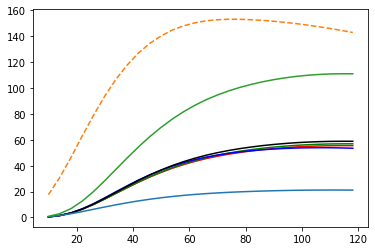

In [150]:
plt.plot(RR, cv_6000, 'r')
plt.plot(RR, cv_6000_ns971, 'g')
plt.plot(RR, cv_6000_omc1242, 'b')
plt.plot(RR, cv_6000_H066, 'k')
plt.plot(RR, cv_6000_b1_6)
plt.plot(RR, cv_6000_w_na, '--')
plt.plot(RR, cv_3000);

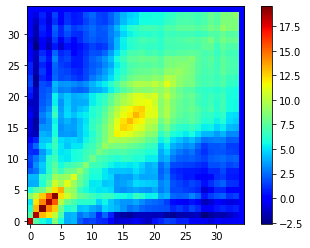

In [48]:
# cjk is calculated using Julia with min mass 5e12
cjk = pd.read_csv("/home/nareg/CODE/Julia/FileName.csv", header = None)
plt.imshow(cjk.values, origin = "lower", cmap = "jet", vmax = 1 * cjk.values.max())
plt.colorbar();

# $\mathrm{N_{pair}}$:

In [70]:
#C_v12_measure = np.loadtxt('/home/nareg/Downloads/C_v12_measurement_10_100_2_3e13.txt')

In [25]:
C_v12_measure.shape

(46, 46)

In [26]:
CV.shape, SN.shape

((46, 46), (46, 46))

In [27]:
C = CV + SN + C_v12_measure

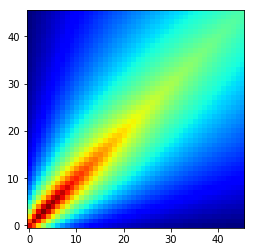

In [29]:
plt.imshow(C, origin='lower', cmap = cm.jet)

In [30]:
C.shape

(46, 46)

In [31]:
pwd

'/home/nareg/Desktop/Code_Purgatory'

In [32]:
np.savetxt('COV.txt', C)